In [12]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

In [13]:
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral
batch_size = 256
epochs = 25

In [14]:
with open("fer2013.csv") as f:
  content = f.readlines()

In [15]:
lines = np.array(content)

num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

number of instances:  35888
instance length:  2304


In [16]:
#initialize trainset and test set
x_train, y_train, x_test, y_test = [], [], [], []

#------------------------------
#transfer train and test set data
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")
          
        val = img.split(" ")
            
        pixels = np.array(val, 'float32')
        
        emotion = keras.utils.to_categorical(emotion, num_classes)
    
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
      print("", end="")

In [17]:
#data transformation for train and test sets
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

28709 train samples
3589 test samples


In [18]:
#construct CNN structure
model = Sequential()

#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

In [20]:
#Compile model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [21]:
#train model
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          shuffle=True)



#Save model
model.save('model25.h5')

Epoch 1/25
113/113 [==============================] - 110s 978ms/step - loss: 1.8229 - accuracy: 0.2450 - val_loss: 1.8104 - val_accuracy: 0.2494
Epoch 2/25
113/113 [==============================] - 107s 948ms/step - loss: 1.7912 - accuracy: 0.2522 - val_loss: 1.8106 - val_accuracy: 0.2460
Epoch 3/25
113/113 [==============================] - 100s 881ms/step - loss: 1.7035 - accuracy: 0.3041 - val_loss: 1.6472 - val_accuracy: 0.3396
Epoch 4/25
113/113 [==============================] - 100s 882ms/step - loss: 1.5902 - accuracy: 0.3674 - val_loss: 1.5462 - val_accuracy: 0.3904
Epoch 5/25
113/113 [==============================] - 100s 889ms/step - loss: 1.5072 - accuracy: 0.4105 - val_loss: 1.4673 - val_accuracy: 0.4285
Epoch 6/25
113/113 [==============================] - 101s 896ms/step - loss: 1.4347 - accuracy: 0.4457 - val_loss: 1.4531 - val_accuracy: 0.4369
Epoch 7/25
113/113 [==============================] - 101s 890ms/step - loss: 1.3756 - accuracy: 0.4687 - val_loss: 1.4064 -

In [23]:
#Evaluation
train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.7447227239608765
Train accuracy: 72.24215269088745
Test loss: 1.273367166519165
Test accuracy: 55.97659349441528


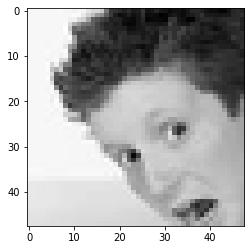

[3.2179531e-02 5.1902523e-05 1.5928562e-01 3.3010545e-01 2.2247488e-02
 3.0794340e-01 1.4818656e-01]


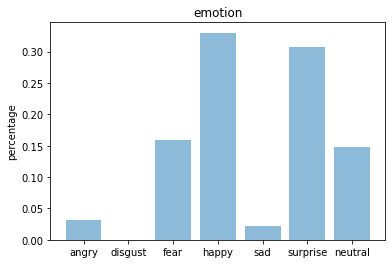

----------------------------------------------


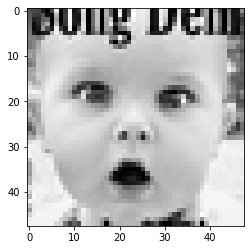

[2.7550629e-03 2.2570493e-06 9.7642718e-03 9.5341675e-04 2.2891301e-04
 9.8514003e-01 1.1560199e-03]


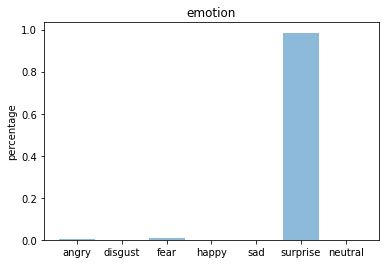

----------------------------------------------


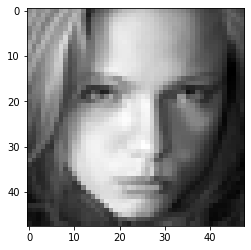

[1.1779252e-02 7.0548398e-05 1.6176160e-01 4.0872066e-04 7.7115011e-01
 1.5487772e-04 5.4674882e-02]


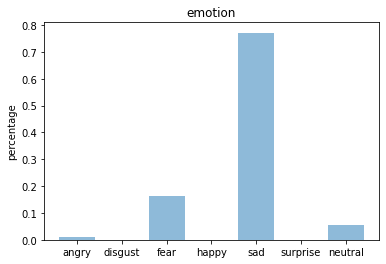

----------------------------------------------


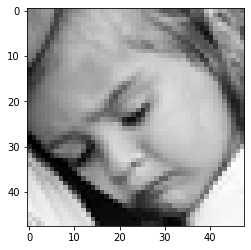

[3.0983225e-03 1.7152597e-05 8.6551912e-02 5.3079375e-03 7.8581536e-01
 8.6663618e-05 1.1912270e-01]


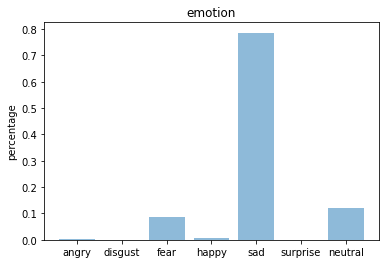

----------------------------------------------


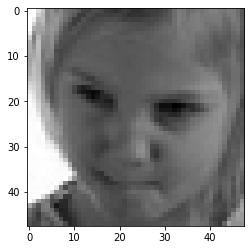

[0.45486403 0.0399546  0.07988532 0.05546967 0.31851742 0.00072203
 0.05058688]


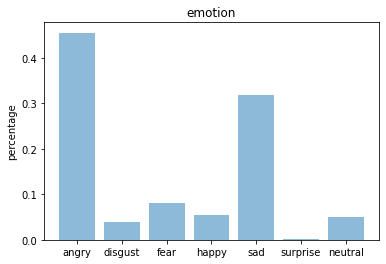

----------------------------------------------


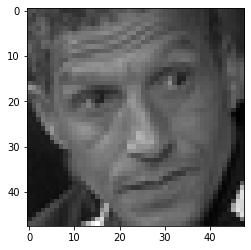

[0.20584632 0.00197277 0.22717594 0.00654391 0.19654036 0.01779552
 0.34412518]


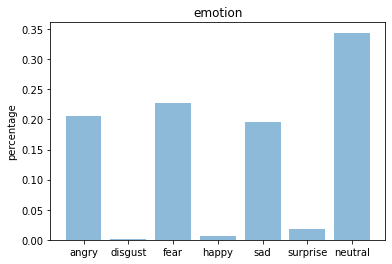

----------------------------------------------


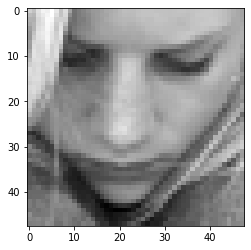

[9.8648090e-03 8.2325988e-04 2.6998797e-01 5.8631512e-04 7.1240181e-01
 1.4651972e-05 6.3211615e-03]


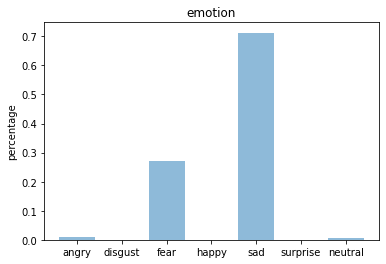

----------------------------------------------


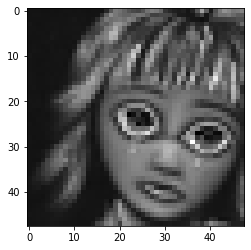

[5.0673816e-02 2.8005186e-05 1.5512043e-02 7.4955493e-01 1.0756606e-01
 2.7877319e-04 7.6386362e-02]


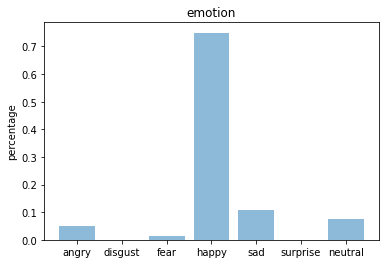

----------------------------------------------


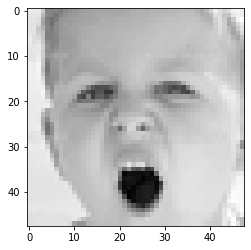

[7.4962902e-01 9.3027493e-06 2.1426627e-01 3.4371496e-04 2.1517245e-02
 3.4359242e-03 1.0798503e-02]


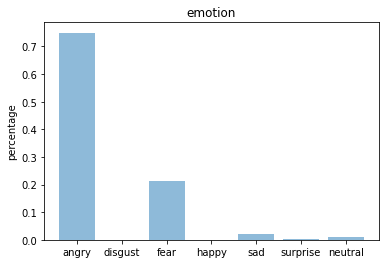

----------------------------------------------


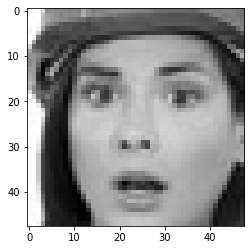

[2.6221429e-03 4.4365599e-05 6.1627742e-02 7.4733671e-04 3.4633535e-03
 9.2860705e-01 2.8880402e-03]


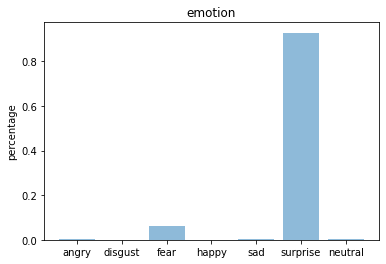

----------------------------------------------


In [25]:
#test on the test set
monitor_testset_results = True

if monitor_testset_results == True:
    #make predictions for test set
    predictions = model.predict(x_test)

    index = 0
    for i in predictions:
        if index < 30 and index >= 20:
            #print(i) #predicted scores
            #print(y_test[index]) #actual scores

            testing_img = np.array(x_test[index], 'float32')
            testing_img = testing_img.reshape([48, 48]);

            plt.gray()
            plt.imshow(testing_img)
            plt.show()
            
            print(i)
            emotion_analysis(i)
            print("----------------------------------------------")
        index = index + 1

In [22]:
#function for drawing bar chart for emotion preditionsc
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

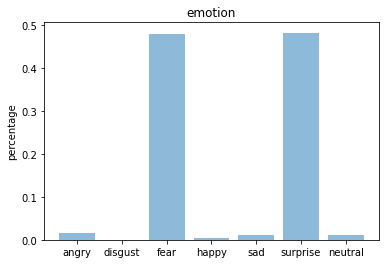

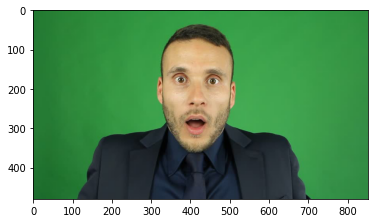

In [35]:
#test on unseen images
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = 'img9.jpg'
true_image = image.load_img(file)
img = image.load_img(file, grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(true_image)
plt.show()

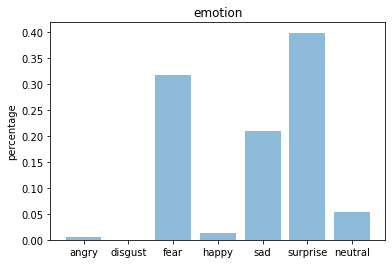

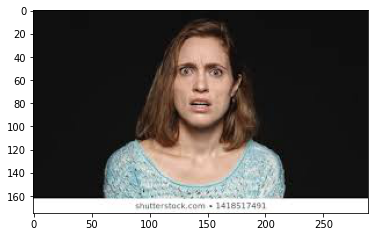

In [38]:
file = 'img12.jpg'
true_image = image.load_img(file)
img = image.load_img(file, grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(true_image)
plt.show()